In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyproj
from grid import Grid

we need an image of global earth land and ocean features:
download it form https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/raster/NE1_50M_SR_W.zip

In [2]:
ds = 5 ##down sample to reduce memory load here
im = plt.imread('/cluster/work/users/yingyue/NE1_50M_SR_W.tif')[::ds, ::ds, :]

In [3]:
##the coordinates for im
dx = 360./10800*ds
dy = 180./5400*ds
x, y = np.meshgrid(np.arange(-179.99, 180, dx), np.arange(90, -90, -dy))
proj = pyproj.Proj('+proj=longlat')
grid = Grid(proj, x, y, cyclic_dim='x', pole_dim='y', pole_index=(0, -1))

choose target map projection and make a regular grid

find a list of available projections: https://proj.org/en/9.2/operations/projections/index.html

In [16]:
##1. mercator
grid1 = Grid.regular_grid(pyproj.Proj("+proj=merc"), -2e7, 2e7, -1.6e7, 1.6e7, dx=5e4)
figsize = (10,7)

In [7]:
##2. polar stereographic
grid1 = Grid.regular_grid(pyproj.Proj("+proj=stere +lat_0=90 +lon_0=0"), -3e6, 3e6, -3e6, 3e6, dx=3e3)
figsize = (8,8)

In [11]:
##3. lambert conic conformal
grid1 = Grid.regular_grid(pyproj.Proj("+proj=lcc +lon_0=-30 +lat_1=40 +lat_2=60"), -3e6, 3e6, 1e6, 11e6, dx=3e3)
figsize = (8,10)

In [13]:
##4. orthographic (satellite view)
grid1 = Grid.regular_grid(pyproj.Proj("+proj=ortho +lon_0=0 +lat_0=-60"), -7e6, 7e6, -7e6, 7e6, dx=1e4)
figsize = (10, 10)

now let's convert the earth image to the selected projection and visualise

In [17]:
##converter to new proj, see grid_convert.ipynb for more details
grid.set_destination_grid(grid1)
im1 = np.full(grid1.x.shape+(3,), 0, dtype=np.int16)
for i in range(3):
    im1[...,i] = grid.convert(im[...,i])

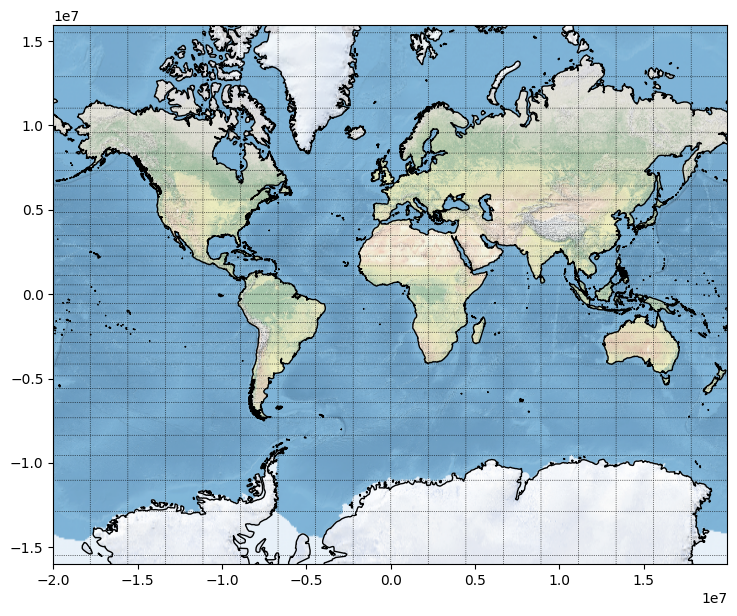

In [18]:
##draw the earth image in proj1
fig, ax = plt.subplots(1, 1, figsize=figsize)

##note: imshow has y direction reversed
##use extent=[] to set the right coordinates for imshow
ax.imshow(im1, origin='lower', extent=[grid1.xmin, grid1.xmax, grid1.ymin, grid1.ymax])
grid1.plot_land(ax)
